In [33]:
import pandas as pd
from src.utils.data import Dataset
from src.common.constant import PATH
from src.models.model_tf import Model_TF
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from src.utils.feature_selection import feature_selection
from src.common.model_holder import sklearn_model
from sklearn.feature_selection import SelectFromModel, f_regression

In [34]:
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 999)

# Preprocessing

In [35]:
#const for preprocessing
FILE = 'experiment/AstanaJapura.csv'
SCALING_OPTION = 'Robust'
PERCENTAGE = 0.8
DROP_LOW = True
SCALE = True
df = pd.read_csv(FILE)

# Data normalization

In [ ]:
normalize = [True, False]
targets = ['dl_avg', 'ul_avg']
predicted = {
    'normalize' : [],
    'target' : [],
    'MAE' : [],
    'MSE' : [],
    'R_Squared' : [],
    'MAPE' : [],
    'MSLE' : []
}
total_iter = len(normalize)*len(targets)*100
for iter in tqdm(range(total_iter)):
    for norm in normalize:
        for target in targets:
            #data preprocess
            data = Dataset(df, target, 'Univariable')
            data('Univariable', time_lag=1, scale=norm, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=False)
            #to get the average later
            MAEs = []
            MSEs = []
            R_Squareds = []
            MAPEs = []
            MSLEs = []
            #train the model for 100 times 
            for i in range(100):
                #create FNN model
                model = Model_TF(data)
                model.create(['Dense', 'Dense'], [8,4], 1000, 'Huber', 'Adam', 'MSE', 0.001, "mean_squared_error", True, 5)
                #visualize_df = model.visualize(norm)
                eval_metric = model.evaluate(norm)
                MAEs.append(eval_metric['Score'][0])
                MSEs.append(eval_metric['Score'][1])
                R_Squareds.append(eval_metric['Score'][2])
                MAPEs.append(eval_metric['Score'][3])
                MSLEs.append(eval_metric['Score'][4])
            #make evaluation df
            predicted['normalize'].append(norm)
            predicted['target'].append(target)
            predicted['MAE'].append(round(np.mean(MAEs),3))
            predicted['MSE'].append(round(np.mean(MSEs),3))
            predicted['R_Squared'].append(round(np.mean(R_Squareds),3))
            predicted['MAPE'].append(round(np.mean(MAPEs),3))
            predicted['MSLE'].append(round(np.mean(MSLEs),3))


INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl

In [ ]:
pd.DataFrame(predicted)

,normalize,target,MAE,MSE,R_Squared,MAPE,MSLE
0,True,dl_avg,1.531,3.836,0.025,0.206,0.049
1,True,ul_avg,0.234,0.090,0.025,0.293,0.023
2,False,dl_avg,1.572,4.115,-0.046,0.210,0.053
3,False,ul_avg,0.242,0.095,-0.025,0.308,0.024


In [ ]:
pd.DataFrame(predicted).to_csv('experiment/exp_results/data_normalization.csv', index=False)

# Windowing Dataset

In [ ]:
time_lags = [i for i in range(1,25)]
targets = ['dl_avg', 'ul_avg']
predicted = {
    'timelag' : [],
    'target' : [],
    'MAE' : [],
    'MSE' : [],
    'R_Squared' : [],
    'MAPE' : [],
    'MSLE' : []
}
total_iter = len(time_lags)*len(targets)*100
for iter in tqdm(range(total_iter)):
    for target in targets:
        for time_lag in time_lags:
            #data preprocess
            data = Dataset(df, target, 'Univariable')
            data('Univariable', time_lag=time_lag, scale=SCALE, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=False)
            #to get the average later
            MAEs = []
            MSEs = []
            R_Squareds = []
            MAPEs = []
            MSLEs = []
            #train the model for 100 times 
            for i in range(100):
                #create FNN model
                model = Model_TF(data)
                model.create(['Dense', 'Dense'], [8,4], 1000, 'Huber', 'Adam', 'MSE', 0.001, "mean_squared_error", True, 5)
                #visualize_df = model.visualize(SCALE)
                eval_metric = model.evaluate(SCALE)
                MAEs.append(eval_metric['Score'][0])
                MSEs.append(eval_metric['Score'][1])
                R_Squareds.append(eval_metric['Score'][2])
                MAPEs.append(eval_metric['Score'][3])
                MSLEs.append(eval_metric['Score'][4])
            #make evaluation df
            predicted['timelag'].append(time_lag)
            predicted['target'].append(target)
            predicted['MAE'].append(round(np.mean(MAEs),3))
            predicted['MSE'].append(round(np.mean(MSEs),3))
            predicted['R_Squared'].append(round(np.mean(R_Squareds),3))
            predicted['MAPE'].append(round(np.mean(MAPEs),3))
            predicted['MSLE'].append(round(np.mean(MSLEs),3))


INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets
INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl

In [ ]:
pd.DataFrame(predicted).to_csv('experiment/exp_results/windowing_dataset.csv',index=False)

In [17]:
predicted = pd.read_csv('experiment/exp_results/windowing_dataset.csv')
dl_df = predicted[predicted['target']=='dl_avg']
ul_df = predicted[predicted['target']=='ul_avg']

Text(0, 0.5, 'Downlink Average (kb/s) MAE ')

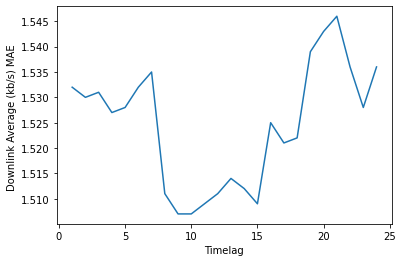

In [ ]:
sns.lineplot(x=range(1,len(dl_df)+1), y=dl_df['MAE'], )
plt.xlabel('Timelag')
plt.ylabel('Downlink Average (kb/s) MAE ')

Text(0, 0.5, 'Uplink Average (kb/s) MAE')

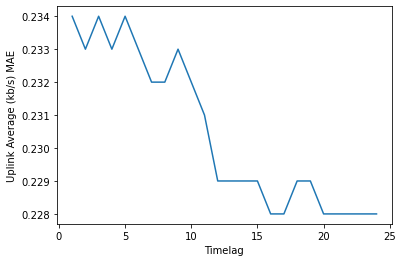

In [ ]:
sns.lineplot(x=range(1,len(ul_df)+1), y=ul_df['MAE'])
plt.xlabel('Timelag')
plt.ylabel('Uplink Average (kb/s) MAE')

In [ ]:
dl_df.sort_values(by = 'MAE').head()

,timelag,target,MAE,MSE,R_Squared,MAPE,MSLE
8,9,dl_avg,1.507,3.782,0.039,0.203,0.048
9,10,dl_avg,1.507,3.767,0.043,0.203,0.048
10,11,dl_avg,1.509,3.775,0.040,0.203,0.049
14,15,dl_avg,1.509,3.781,0.039,0.204,0.049
11,12,dl_avg,1.511,3.785,0.038,0.204,0.049


In [ ]:
ul_df.sort_values(by = 'MAE').head()

,timelag,target,MAE,MSE,R_Squared,MAPE,MSLE
47,24,ul_avg,0.228,0.086,0.063,0.275,0.022
45,22,ul_avg,0.228,0.087,0.057,0.277,0.022
44,21,ul_avg,0.228,0.087,0.059,0.278,0.022
43,20,ul_avg,0.228,0.087,0.055,0.280,0.022
40,17,ul_avg,0.228,0.088,0.047,0.280,0.022


# Feature Selection

In [ ]:
#preprocess data
data = Dataset(df, 'dl_avg', 'Multivariable')
#feature selection
data.X = feature_selection(data.X, data.y, how='RFE', n_features_to_select=20, step=0.5)
data.columns = data.X.columns
data('Multivariable', time_lag=9, scale=SCALE, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=True)
#create FNN model
model = Model_TF(data)
model.create(['Dense', 'Dense'], [8,4], 1000, 'Huber', 'Adam', 'MSE', 0.001, "mean_squared_error", True, 5)
#visualize_df = model.visualize(SCALE)
eval_metric = model.evaluate(SCALE)

INFO:tensorflow:Assets written to: c:\Users\danendra\datsci\throughput_prediction_using_dl_and_ml\resources\model\model_tf\assets


In [ ]:
n_features = [i for i in range(2, 60)]
feature_selections = ['Correlation', 'SelectKBest', 'RFE', 'SelectFromModel', 'PCA']
targets = ['dl_avg', 'ul_avg']
predicted = {
    'n_features' : [],
    'feature_selection':[],
    'features':[],
    'target' : [],
    'MAE' : [],
    'MSE' : [],
    'R_Squared' : [],
    'MAPE' : [],
    'MSLE' : []
}
total_train = 100
total_iter = len(n_features)*len(feature_selections)*len(targets)
error = 0
error_select = []
error_n_feature = []
with tqdm(total=total_iter) as pbar:
    for target in targets:
        for select in feature_selections:
            for n_feature in n_features:
                #preprocess data
                data = Dataset(df, target, 'Multivariable')
                #time lag selection based on previous result
                if target == 'dl_avg':
                    time_lag = 9
                else:
                    time_lag = 24
                #feature selection
                if select == 'Correlation':
                    data.X = feature_selection(data.X, data.y, how=select, n_features=n_feature, threshold=None)
                elif select == 'SelectKBest':
                    data.X = feature_selection(data.X, data.y, how=select, k=n_feature, score_func=f_regression)
                elif select == 'RFE':
                    data.X = feature_selection(data.X, data.y, how=select, n_features_to_select=n_feature, step=0.5)
                elif select == 'PCA':
                    data.X = feature_selection(data.X, data.y, how=select, n_components=n_feature, random_state=42)
                elif select == 'SelectFromModel':
                    data.X = feature_selection(data.X, data.y, how=select, threshold=-np.inf, max_features=n_feature)
                data.columns = data.X.columns
                data('Multivariable', time_lag=time_lag, scale=SCALE, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=True)
                #to get the average later
                MAEs = []
                MSEs = []
                R_Squareds = []
                MAPEs = []
                MSLEs = []
                #train the model for 100 times 
                for i in range(total_train):
                    model = Model_TF(data)
                    #create FNN model
                    model.create(['Dense', 'Dense'], [8,4], 1000, 'Huber', 'Adam', 'MSE', 0.001, "mean_squared_error", True, 5)
                    eval_metric = model.evaluate(SCALE)
                    MAEs.append(eval_metric['Score'][0])
                    MSEs.append(eval_metric['Score'][1])
                    R_Squareds.append(eval_metric['Score'][2])
                    MAPEs.append(eval_metric['Score'][3])
                    MSLEs.append(eval_metric['Score'][4])
                #make evaluation df
                predicted['n_features'].append(n_feature)
                predicted['feature_selection'].append(select)
                predicted['target'].append(target)
                predicted['features'].append(data.columns)
                predicted['MAE'].append(round(np.mean(MAEs),3))
                predicted['MSE'].append(round(np.mean(MSEs),3))
                predicted['R_Squared'].append(round(np.mean(R_Squareds),3))
                predicted['MAPE'].append(round(np.mean(MAPEs),3))
                predicted['MSLE'].append(round(np.mean(MSLEs),3))
                pbar.update(1)

In [ ]:
pred = model.model.predict(data.X_test)
pred = data.transformer.inverse_transform(pred)
(pred<0).any()

True

In [ ]:
pd.DataFrame(predicted).to_csv('experiment/exp_results/feature_selection.csv', index=False)

In [ ]:
predicted = pd.read_csv('experiment/exp_results/feature_selection.csv')
dl_df = predicted[predicted['target']=='dl_avg']
ul_df = predicted[predicted['target']=='ul_avg']

<AxesSubplot:xlabel='n_features', ylabel='MAE'>

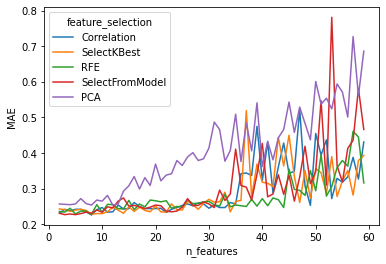

In [ ]:
sns.lineplot(x='n_features', y='MAE', data=ul_df, hue='feature_selection')

<AxesSubplot:xlabel='n_features', ylabel='MAE'>

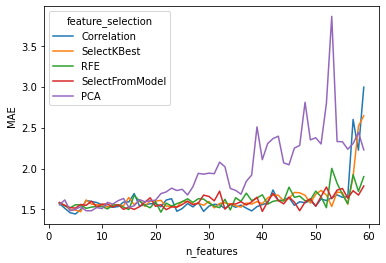

In [ ]:
sns.lineplot(x='n_features', y='MAE', data=dl_df, hue='feature_selection')

<AxesSubplot:xlabel='n_features', ylabel='MAE'>

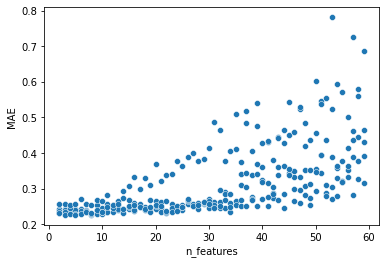

In [ ]:
sns.scatterplot(x='n_features', y='MAE', data=ul_df)

<AxesSubplot:xlabel='n_features', ylabel='MAE'>

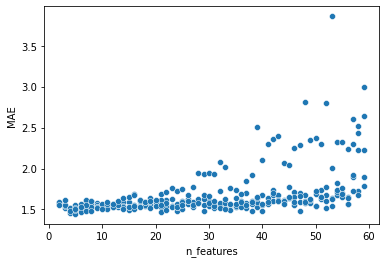

In [ ]:
sns.scatterplot(x='n_features', y='MAE', data=dl_df)

In [ ]:
dl_df.sort_values(by='MAE')

,n_features,feature_selection,features,target,MAE,MSE,R_Squared,MAPE,MSLE
3,5,Correlation,Index(['MS_Average PDCP Layer Active Cell Thro...,dl_avg,1.444,3.564,0.094,0.193,0.046
2,4,Correlation,Index(['MS_Average PDCP Layer Active Cell Thro...,dl_avg,1.460,3.621,0.080,0.195,0.046
135,21,RFE,"Index(['E-RAB Setup Success Ratio_LTE(%)',\n ...",dl_avg,1.466,3.568,0.093,0.196,0.046
62,6,SelectKBest,Index(['Average eNodeB RB utilization UL_LTE(%...,dl_avg,1.472,3.649,0.072,0.196,0.047
212,40,SelectFromModel,"Index(['RRC Setup Success Ratio_LTE(%)', 'E-RA...",dl_avg,1.476,3.686,0.063,0.191,0.046
...,...,...,...,...,...,...,...,...,...
115,59,SelectKBest,Index(['RRC Setup Success Ratio_NOM_LTE(number...,dl_avg,2.646,37.501,-8.532,0.349,0.000
282,52,PCA,"Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pc...",dl_avg,2.796,13.959,-2.548,0.376,0.137
278,48,PCA,"Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pc...",dl_avg,2.809,15.391,-2.912,0.361,0.135
57,59,Correlation,Index(['MS_Average PDCP Layer Active Cell Thro...,dl_avg,2.994,65.412,-15.627,0.410,0.000


In [ ]:
ul_df.sort_values(by='MAE')

,n_features,feature_selection,features,target,MAE,MSE,R_Squared,MAPE,MSLE
296,8,Correlation,Index(['MS_Average PDCP Layer Active Cell Thro...,ul_avg,0.226,0.085,0.081,0.268,0.021
465,3,SelectFromModel,"Index(['dl_peak', 'RTWP_LTE(dB)',\n 'MS_...",ul_avg,0.227,0.087,0.053,0.276,0.022
467,5,SelectFromModel,"Index(['dl_peak', 'MS_RTWP(dBm)', 'RTWP_LTE(dB...",ul_avg,0.227,0.086,0.071,0.270,0.021
412,8,RFE,"Index(['Packet Delay Budget (UE to PGW)', 'dl_...",ul_avg,0.228,0.086,0.072,0.268,0.021
354,8,SelectKBest,"Index(['dl_avg', 'ul_peak', 'MS_Volume Traffic...",ul_avg,0.228,0.088,0.045,0.274,0.022
...,...,...,...,...,...,...,...,...,...
574,54,PCA,"Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pc...",ul_avg,0.594,0.576,-5.242,0.678,0.000
570,50,PCA,"Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pc...",ul_avg,0.601,0.549,-4.955,0.661,0.000
579,59,PCA,"Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pc...",ul_avg,0.686,0.787,-7.530,0.781,0.000
577,57,PCA,"Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pc...",ul_avg,0.727,0.954,-9.339,0.757,0.000


# Model Selection

In [15]:
model_names = ['LSTM', 'FNN']
data_types = ['Univariable', 'Multivariable']
targets = ['dl_avg', 'ul_avg']
predicted = {
    'model' : [],
    'data type':[],
    'target' : [],
    'MAE' : [],
    'MSE' : [],
    'R_Squared' : [],
    'MAPE' : [],
    'MSLE' : []
}
total_train = 100
total_iter = len(model_names)*len(data_types)*len(targets)
all_vis_df = pd.DataFrame()
with tqdm(total=total_iter) as pbar:
    for target in targets:
        for data_type in data_types:
            for model_name in model_names:
                #time lag selection based on previous result
                if target == 'dl_avg':
                    time_lag = 9
                else:
                    time_lag = 24
                #data preprocess
                if data_type == 'Univariable':
                    data = Dataset(df, target, 'Univariable')
                    data(data_type, time_lag=time_lag, scale=SCALE, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=False)
                else:
                    data = Dataset(df, target, 'Multivariable')
                    #feature selection
                    if target == 'dl_avg':
                        data.X = feature_selection(data.X, data.y, how='Correlation', n_features=5, threshold=None)
                    else:
                        data.X = feature_selection(data.X, data.y, how='Correlation', n_features=8, threshold=None)
                    data.columns = data.X.columns
                    data('Multivariable', time_lag=time_lag, scale=SCALE, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=True)
                #to get the average later
                MAEs = []
                MSEs = []
                R_Squareds = []
                MAPEs = []
                MSLEs = []
                #train the model for 100 times 
                for i in range(total_train):
                    model = Model_TF(data)
                    #create FNN model
                    if model_name == 'FNN':
                        model.create(['Dense', 'Dense'], [8,4], 1000, 'Huber', 'Adam', 'MSE', 0.001, "mean_squared_error", True, 5)
                    else:
                        model.create(['LSTM', 'LSTM'], [8,4], 1000, 'Huber', 'Adam', 'MSE', 0.001, "mean_squared_error", True, 5)
                    
                    eval_metric = model.evaluate(SCALE)
                    MAEs.append(eval_metric['Score'][0])
                    MSEs.append(eval_metric['Score'][1])
                    R_Squareds.append(eval_metric['Score'][2])
                    MAPEs.append(eval_metric['Score'][3])
                    MSLEs.append(eval_metric['Score'][4])
                #make evaluation df
                predicted['model'].append(model_name)
                predicted['data type'].append(data_type)
                predicted['target'].append(target)
                predicted['MAE'].append(round(np.mean(MAEs),3))
                predicted['MSE'].append(round(np.mean(MSEs),3))
                predicted['R_Squared'].append(round(np.mean(R_Squareds),3))
                predicted['MAPE'].append(round(np.mean(MAPEs),3))
                predicted['MSLE'].append(round(np.mean(MSLEs),3))
                #make visualization df
                visualize_df = model.visualize(SCALE)
                all_vis_df[f'{model_name}_{data_type}_{target}_prediction'] = visualize_df['y_predicted']
                all_vis_df['original_y'] = visualize_df['y_original']
                pbar.update(1)


100%|██████████| 8/8 [57:59<00:00, 434.88s/it]  


In [16]:
all_vis_df.to_csv('experiment/exp_results/visualize_df.csv', index=False)
pd.DataFrame(predicted).to_csv('experiment/exp_results/model_selection.csv', index=False)

In [26]:
predicted = pd.read_csv('experiment/exp_results/model_selection.csv')
predicted[predicted['data type']=='Multivariable']

,model,data type,target,MAE,MSE,R_Squared,MAPE,MSLE
2,LSTM,Multivariable,dl_avg,1.735,5.053,-0.285,0.228,0.063
3,FNN,Multivariable,dl_avg,1.486,3.731,0.052,0.198,0.048
6,LSTM,Multivariable,ul_avg,0.293,0.152,-0.645,0.348,0.035
7,FNN,Multivariable,ul_avg,0.240,0.094,-0.017,0.286,0.024


In [39]:
all_vis_df['original_y_ul_avg'] = data.y_test

In [42]:
all_vis_df[['original_y_dl_avg', 'LSTM_Multivariable_dl_avg_prediction', 'FNN_Multivariable_dl_avg_prediction', 'original_y_ul_avg', 'LSTM_Multivariable_ul_avg_prediction', 'FNN_Multivariable_ul_avg_prediction']].to_csv('experiment/exp_results/visualize_df.csv')

In [68]:
#test visualize
data = Dataset(df, 'ul_avg', 'Multivariable')
#feature selection
data.X = feature_selection(data.X, data.y, how='Correlation', n_features=8, threshold=None)#5 for dl 8 for ul
data.columns = data.X.columns
data('Multivariable', time_lag=time_lag, scale=SCALE, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=True)
model = Model_TF(data)
#model.create(['Dense', 'Dense'], [8,4], 1000, 'Huber', 'Adam', 'MSE', 0.001, "mean_squared_error", True, 5)
model.create(['LSTM', 'LSTM'], [8,4], 1000, 'Huber', 'Adam', 'MSE', 0.001, "mean_squared_error", True, 5)
visualize_df = model.visualize(SCALE)


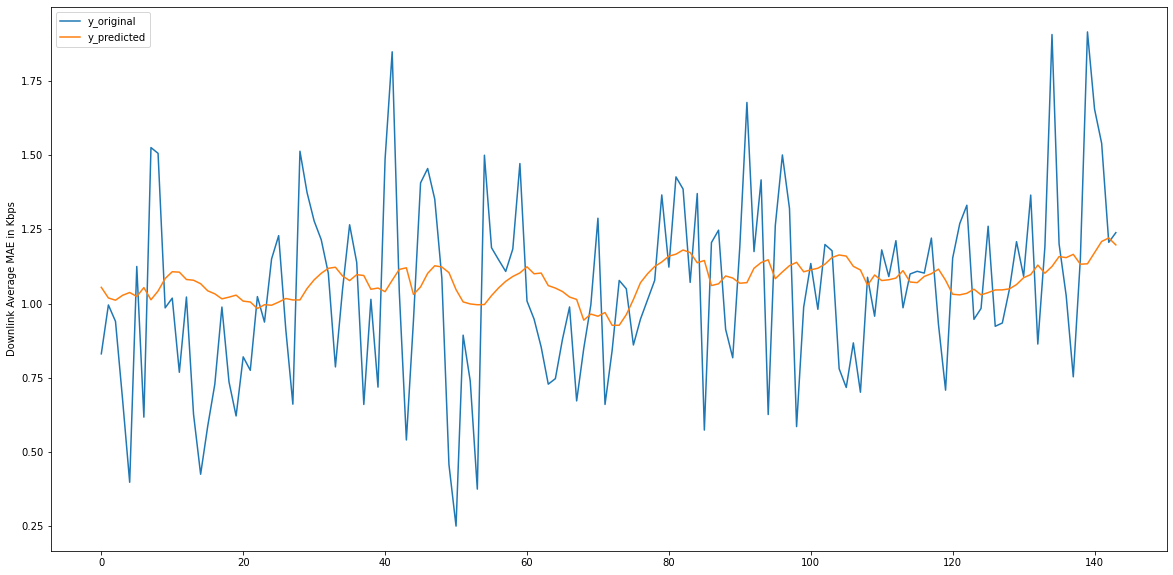

In [69]:
fig , ax = plt.subplots(1,1 , figsize=(20,10))
plt.plot(range(len(visualize_df)), visualize_df['y_original'])
plt.plot(range(len(visualize_df)), visualize_df['y_predicted'])
plt.ylabel('Downlink Average MAE in Kbps')
plt.legend(['y_original', 'y_predicted'])
plt.show()

In [60]:
all_vis_df = pd.read_csv('experiment/exp_results/visualize_df.csv')
all_vis_df

,Unnamed: 0,original_y_dl_avg,LSTM_Multivariable_dl_avg_prediction,FNN_Multivariable_dl_avg_prediction,original_y_ul_avg,LSTM_Multivariable_ul_avg_prediction,FNN_Multivariable_ul_avg_prediction
0,0,7.3348,7.720762,8.280394,0.8309,1.052735,1.153752
1,1,7.0738,8.317182,8.640613,0.9954,1.044554,1.107960
2,2,9.6165,9.085119,9.010930,0.9403,1.043813,0.997967
3,3,8.3826,9.783283,9.423469,0.6768,1.056357,1.096543
4,4,3.2012,10.309070,8.749862,0.3985,1.070592,0.995201
...,...,...,...,...,...,...,...
139,139,11.7146,7.965144,8.476157,1.9146,1.152600,1.132634
140,140,10.2970,7.900556,8.976358,1.6546,1.180480,1.337515
141,141,7.3909,7.708658,7.361749,1.5394,1.199043,1.306347
142,142,7.8335,7.606610,8.006744,1.2062,1.201396,1.172425


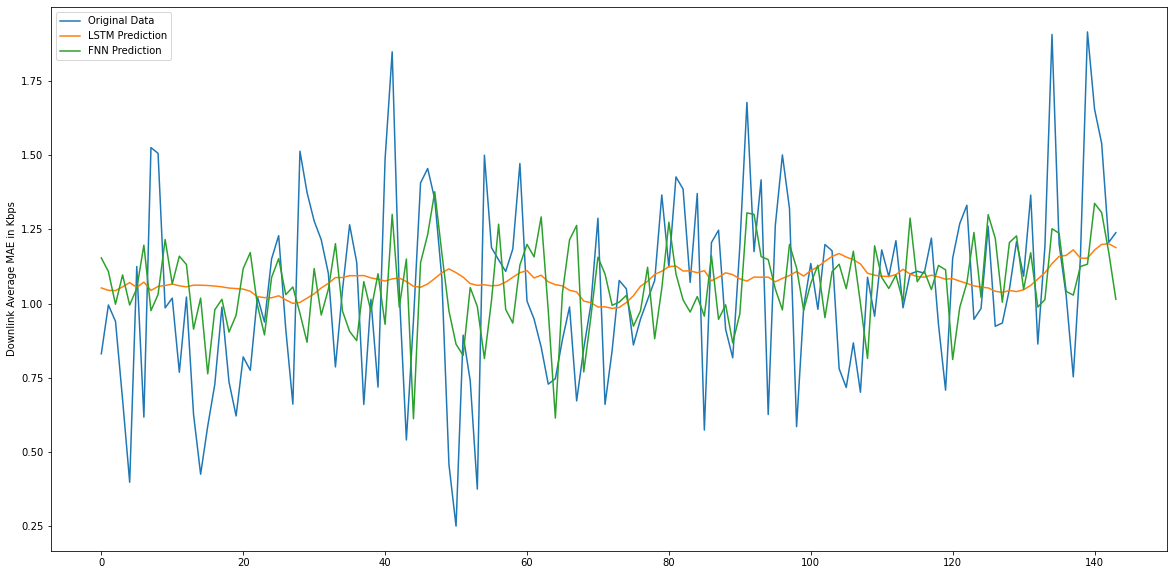

In [64]:
fig , ax = plt.subplots(1,1 , figsize=(20,10))
plt.plot(range(len(visualize_df)), all_vis_df['original_y_ul_avg'])
plt.plot(range(len(visualize_df)), all_vis_df['LSTM_Multivariable_ul_avg_prediction'])
plt.plot(range(len(visualize_df)), all_vis_df['FNN_Multivariable_ul_avg_prediction'])
plt.ylabel('Downlink Average MAE in Kbps')
plt.legend(['Original Data', 'LSTM Prediction', 'FNN Prediction'])
plt.show()

In [30]:
vis = pd.read_csv('experiment/exp_results/visualize_df.csv')
vis_dl = vis[['original_y_dl_avg', 'LSTM_Multivariable_dl_avg_prediction', 'FNN_Multivariable_dl_avg_prediction']]
vis_ul = vis[['original_y_ul_avg', 'LSTM_Multivariable_ul_avg_prediction', 'FNN_Multivariable_ul_avg_prediction']]

In [23]:
for col in vis_dl.columns:
    vis_dl[col] = vis_dl[col].apply(round, args=(3,))
    vis_dl[col] = vis_dl[col].apply(lambda x:str(x).replace('.', ','))
vis_dl.to_csv('experiment/exp_results/visualize_dl_df.csv', index=False)

C:\Users\danendra\AppData\Local\Temp/ipykernel_1348/726030621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_dl[col] = vis_dl[col].apply(round, args=(3,))
C:\Users\danendra\AppData\Local\Temp/ipykernel_1348/726030621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_dl[col] = vis_dl[col].apply(lambda x:str(x).replace('.', ','))


In [31]:
for col in vis_ul.columns:
    vis_ul[col] = vis_ul[col].apply(round, args=(3,))
    vis_ul[col] = vis_ul[col].apply(lambda x: str(x).replace('.', ','))
vis_ul.to_csv('experiment/exp_results/visualize_ul_df.csv', index=False)

C:\Users\danendra\AppData\Local\Temp/ipykernel_1348/745247239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_ul[col] = vis_ul[col].apply(round, args=(3,))
C:\Users\danendra\AppData\Local\Temp/ipykernel_1348/745247239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_ul[col] = vis_ul[col].apply(lambda x: str(x).replace('.', ','))


In [29]:
vis_ul.apply(lambda x: str(x).replace('.', ','))

original_y_ul_avg                       0      0,831\n1      0,995\n2      0,940\n3   ...
LSTM_Multivariable_ul_avg_prediction    0      1,053\n1      1,045\n2      1,044\n3   ...
FNN_Multivariable_ul_avg_prediction     0      1,154\n1      1,108\n2      0,998\n3   ...
dtype: object

In [32]:
vis_ul

,original_y_ul_avg,LSTM_Multivariable_ul_avg_prediction,FNN_Multivariable_ul_avg_prediction
0,"0,831","1,053","1,154"
1,"0,995","1,045","1,108"
2,"0,94","1,044","0,998"
3,"0,677","1,056","1,097"
4,"0,399","1,071","0,995"
...,...,...,...
139,"1,915","1,153","1,133"
140,"1,655","1,18","1,338"
141,"1,539","1,199","1,306"
142,"1,206","1,201","1,172"


In [20]:
vis_ul

,original_y_ul_avg,LSTM_Multivariable_ul_avg_prediction,FNN_Multivariable_ul_avg_prediction
0,0.831,1.053,1.154
1,0.995,1.045,1.108
2,0.940,1.044,0.998
3,0.677,1.056,1.097
4,0.399,1.071,0.995
...,...,...,...
139,1.915,1.153,1.133
140,1.655,1.180,1.338
141,1.539,1.199,1.306
142,1.206,1.201,1.172


# Model Generalization

In [5]:
#train the model
#params
time_lag = 24#24 for ul 9 for dl
n_feature = 9 #5 for dl 8 for ul
target = 'ul_avg'
#data preprocess
df = pd.read_csv(FILE)
data = Dataset(df, target, 'Multivariable')
#feature selection
data.X = feature_selection(data.X, data.y, how='Correlation', n_features=n_feature, threshold=None)
data.columns = data.X.columns
data('Multivariable', time_lag=time_lag, scale=SCALE, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=True)
model = Model_TF(data)
model.create(['Dense', 'Dense'], [8,4], 1000, 'Huber', 'Adam', 'MSE', 0.001, "mean_squared_error", True, 5)
pd.DataFrame(model.evaluate(SCALE))

,Metrics,Score
0,MAE,0.257
1,MSE,0.105
2,R_Squared,-0.140
3,MAPE,0.320
4,MSLE,0.027


In [6]:
#predict other df
df = pd.read_csv('resources/csv/100049_jembatan_senen_singajaya_mbts.csv')
#data preprocess
data = Dataset(df, target, 'Multivariable')
#feature selection
data.X = feature_selection(data.X, data.y, how='Correlation', n_features=n_feature, threshold=None)
data.columns = data.X.columns
data('Multivariable', time_lag=time_lag, scale=SCALE, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=True)
model.data = data
pd.DataFrame(model.evaluate(SCALE))

,Metrics,Score
0,MAE,0.405
1,MSE,0.316
2,R_Squared,-0.243
3,MAPE,0.337
4,MSLE,0.046


In [7]:
#predict other df
df = pd.read_csv('resources/csv/100072_ender_selatan_ender_mbts.csv')
#data preprocess
data = Dataset(df, target, 'Multivariable')
#feature selection
data.X = feature_selection(data.X, data.y, how='Correlation', n_features=n_feature, threshold=None)
data.columns = data.X.columns
data('Multivariable', time_lag=time_lag, scale=SCALE, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=True)
model.data = data
pd.DataFrame(model.evaluate(SCALE))

,Metrics,Score
0,MAE,0.181
1,MSE,0.115
2,R_Squared,0.004
3,MAPE,0.323
4,MSLE,0.026


In [8]:
#predict other df
df = pd.read_csv('resources/csv/102248_warujaya_mbts.csv')
#data preprocess
data = Dataset(df, target, 'Multivariable')
#feature selection
data.X = feature_selection(data.X, data.y, how='Correlation', n_features=n_feature, threshold=None)
data.columns = data.X.columns
data('Multivariable', time_lag=time_lag, scale=SCALE, scale_kind=SCALING_OPTION, train_perc=PERCENTAGE, drop_low=True)
model.data = data
pd.DataFrame(model.evaluate(SCALE))

,Metrics,Score
0,MAE,0.246
1,MSE,0.174
2,R_Squared,-0.086
3,MAPE,0.198
4,MSLE,0.027
